In [1]:
## Importing stuff 

import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
sm.init_printing(use_unicode=True)
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets

%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
exec(open("Def_variables.py").read())

In [3]:
## Transistions ligning

f=k**alpha
tc=sm.Eq(0,(s*(1-theta)*k**alpha-(delta+g_b+n)*k))
tcc=sm.solve(tc,k)
tcc

tc_func = sm.lambdify((s,g_b,n,delta,alpha,theta),tcc)
tc_func(0.25,0.015,0.01,0.035,0.25,0.05)


In [4]:
exec(open("Def_values.py").read())

In [5]:
obj_kss = lambda k: 0 - (s*(1-theta)*k**alpha-(delta+g_b+n)*k)
result = optimize.newton(obj_kss,x0=1)
result


In [6]:
def invest_per_work(k, theta):
    return (s*(1-theta)*k**alpha)
def break_even(k):
    return (delta+g_b+n)*k

In [7]:
x_vec = np.linspace(0,50,50)
#theta=np.linspace(0.001,1,100)

In [8]:
def transition_diagram(theta):
    
    fig = plt.figure(figsize=(7,4)) # create the figure
    plt.xlabel('k')
    investment=invest_per_work(x_vec,theta)
    break_even_cap=break_even(x_vec)

    
    plt.title('Green solow transition diagram')
    ax = fig.add_subplot(1,1,1) # create a 3d axis in the figure 
    ax.plot(break_even_cap, label='$(\delta+g_B+n)\cdot k$'); # create surface plot in the axis
    ax.plot(investment, label='$s \cdot (1-\\theta)\cdot k^\\alpha $'); # create surface plot in the axis
    ax.set_xlim([0,50]) # fixed x range
    ax.set_yticklabels([])
    plt.legend()


In [10]:
widgets.interact(transition_diagram,
    
    theta=widgets.FloatSlider(description="$Theta$", min=0, max=1, step=0.01, value=0.05),
    
    
);

interactive(children=(FloatSlider(value=0.05, description='$Theta$', max=1.0, step=0.01), Output()), _dom_clas…

In [11]:
exec(open("Def_variables.py").read())

In [12]:
# Max emision



f=k**alpha
max_emis=sm.Eq(0,(alpha*s*(1-theta)*k**(alpha-1)-(alpha*(delta+g_b+n)-(g_b+n-g_a))))
max_emis_k=sm.solve(max_emis,k)
max_emis_k



max_emis_func = sm.lambdify((s,g_b,n,delta,alpha,theta,g_a),max_emis_k)
max_emis_func(0.25,0.015,0.01,0.035,0.25,0.05,0.03)








In [13]:
exec(open("Def_values.py").read())
obj_kss_ekc = lambda k: 0 - (alpha*s*(1-theta)*k**(alpha-1)-(alpha*(delta+g_b+n)-(g_b+n-g_a)))
result_ekc = optimize.newton(obj_kss_ekc,x0=1)
result_ekc


In [14]:
def ekc(k, theta):
    return (alpha*s*(1-theta)*k**(alpha-1))

def turning_point(alpha):
    return alpha*(delta+g_b+n)-(g_b+n-g_a)

def steady_state(alpha):
    return alpha*(delta+g_b+n)
    


x_vec2 = np.linspace(0.01,200,1000)

In [15]:
steady_state(0.25)

In [38]:
def ekc_diagram(theta):
    fig = plt.figure(figsize=(7,4)) # create the figure
    plt.xlabel('k')
    ekc_calc=ekc(x_vec2, theta)
    steady_state_val=steady_state(alpha)
    turning_point_val=turning_point(alpha)
    plt.title('Generating Environmental Kuznets Curve')
    ax = fig.add_subplot(1,1,1) # create a 3d axis in the figure 
    plt.axhline(y=steady_state_val, color='r', linestyle='-', label="$\\alpha \cdot(\delta+g_B+n)$")
    plt.axhline(y=turning_point_val, color='y', linestyle='-', label="$\\alpha \cdot(\delta+g_B+n)-(g_b+n-g_a)$")
    ax.plot(ekc_calc, label='$\\alpha \cdot s \cdot(1-\\theta)\cdot k^{\\alpha-1}$'); # create surface plot in the axis
    ax.plot([126], [0.015], 'o', color='k')
    ax.plot([84], [0.019999999], 'o', color='k')
    ax.annotate('Point T', xy=(80, 0.02), xytext=(80, 0.022),
               )
    ax.annotate('Point B', xy=(125, 0.015), xytext=(122, 0.016),
               )
    
    
    #ax.set_xlim([0,200]) # fixed x range
    #ax.set_ylim([0,0.05])
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    plt.legend()

    
    
    
  

In [111]:



def ekc_diagram(theta):
    fig = plt.figure(figsize=(7,4)) # create the figure
    plt.xlabel('k')
    ekc_calc=ekc(x_vec2, theta)
    steady_state_val=steady_state(alpha)
    turning_point_val=turning_point(alpha)
    plt.title('Generating Environmental Kuznets Curve')
    ax = fig.add_subplot(1,1,1) # create a 3d axis in the figure 
    plt.axhline(y=steady_state_val, color='r', linestyle='-', label="$\\alpha \cdot(\delta+g_B+n)$")
    plt.axhline(y=turning_point_val, color='y', linestyle='-', label="$\\alpha \cdot(\delta+g_B+n)-(g_b+n-g_a)$")
    ax.plot(ekc_calc, label='$\\alpha \cdot s \cdot(1-\\theta)\cdot k^{\\alpha-1}$'); # create surface plot in the axis
    test=find_nearest2(ekc_calc,steady_state_val)
    test2=find_nearest2(ekc_calc,turning_point_val)
    ax.plot([test], [steady_state_val], 'o', color='k')
    ax.plot([84], [0.019999999], 'o', color='k')
    ax.annotate('Point T', xy=(80, 0.02), xytext=(80, 0.022),
               )
    ax.annotate('Point B', xy=(125, 0.015), xytext=(122, 0.016),
               )
    
    
    #idx = np.argwhere(np.diff(np.sign(ekc_calc - steady_state_val))).flatten()
    #plt.plot(x_vec2[idx], steady_state_val[idx], 'ro')
    #x,y=np.intersect1d([ekc_calc],[turning_point_val],[steady_state_val])
    #plt.scatter(y,"*k")
    ax.set_xlim([0,200]) # fixed x range
    ax.set_ylim([0,0.05])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.legend()

    
    
    
  

In [112]:
def find_nearest2(array, values):
    indices = np.abs(np.subtract.outer(array, values)).argmin(0)
    return indices

ekc_calc=ekc(x_vec2, theta)
ekc_calc_list=list(ekc_calc)
steady_state_val=steady_state(alpha)
turning_point_val=turning_point(alpha)
test=find_nearest2(ekc_calc,steady_state_val)
test2=find_nearest2(ekc_calc,turning_point_val)
#test=ekc_calc_list.index(steady_state_val)
print(test)
print(test2)
print(ekc_calc_list)

31
21
[1.877602360724975, 0.19126886919094177, 0.11580136546203335, 0.08596105203922745, 0.06949188327334027, 0.05889196682852952, 0.051428937842408894, 0.04585449189272517, 0.04151227553389249, 0.03802216163892498, 0.03514783036973132, 0.0327341614595847, 0.030674855625490365, 0.028894476493742608, 0.027337914856497694, 0.02596391517658323, 0.024740941077073232, 0.023644446312107676, 0.022655021623073986, 0.021757104902209456, 0.020938063736521795, 0.020187530155587968, 0.019496909906453527, 0.018859014849347135, 0.018267783726348887, 0.017718067363217713, 0.01720546152344609, 0.016726175465217007, 0.016276927569137085, 0.015854861718052747, 0.015457479747064531, 0.015082586455423864, 0.014728244523838422, 0.014392737306123176, 0.014074537928204527, 0.013772283475266251, 0.013484753310885242, 0.013210850772717211, 0.012949587643689331, 0.012700070917341062, 0.012461491469404971, 0.012233114321186688, 0.012014270238435532, 0.011804348455678312, 0.011602790353049263, 0.01140908394249068

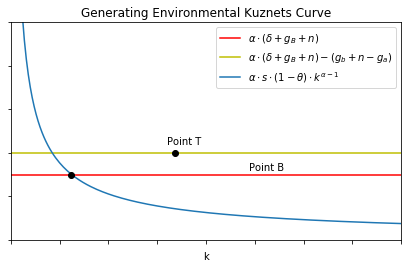

In [113]:
ekc_diagram(theta)

In [115]:
## Som udgangspunkt udgår denne celle ##

widgets.interact(ekc_diagram,
    
    theta=widgets.FloatSlider(description="$Theta$", min=0.005, max=1, step=0.01, value=0.05),
    #x_vec=widgets.float(x_vec),
    
);

interactive(children=(FloatSlider(value=0.05, description='$Theta$', max=1.0, min=0.005, step=0.01), Output())…

In [32]:
def invest_per_work2(k, theta,alpha,s):
    return (s*(1-theta)*k**alpha)
def break_even(k):
    return (delta+g_b+n)*k

In [33]:
def transition_diagram2(theta,alpha,s):
    
    fig = plt.figure(figsize=(7,4)) # create the figure
    plt.xlabel('k')
    investment=invest_per_work2(x_vec,theta,alpha,s)
    break_even_cap=break_even(x_vec)

    
    plt.title('Green solow transition diagram')
    ax = fig.add_subplot(1,1,1) # create a 3d axis in the figure 
    ax.plot(break_even_cap, label='$(\delta+g_B+n)\cdot k$'); # create surface plot in the axis
    ax.plot(investment, label='$s \cdot (1-\\theta)\cdot k^\\alpha $'); # create surface plot in the axis
    ax.set_xlim([0,50]) # fixed x range
    ax.set_yticklabels([])
    plt.legend()


In [34]:
widgets.interact(transition_diagram2,
    
    theta=widgets.FloatSlider(description="$Theta$", min=0, max=1, step=0.01, value=0.05),
    alpha=widgets.FloatSlider(description="$Alpha$", min=0, max=1, step=0.01, value=0.25),
    s=widgets.FloatSlider(description="$s$", min=0, max=1, step=0.01, value=0.25),
    
);

interactive(children=(FloatSlider(value=0.05, description='$Theta$', max=1.0, step=0.01), FloatSlider(value=0.…